In [1]:
# начальные файлы
import pandas as pd
behaviour = '../data/src/behavior_2023.csv'
feedbackPath = '../data/src/feedback.csv'

C:\Users\honor\AppData\Local\Temp\ipykernel_21924\2672004391.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
behaviourData = pd.read_csv(behaviour, sep=';')
feedbackData = pd.read_csv(feedbackPath, sep=';')

In [3]:
behaviourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66865 entries, 0 to 66864
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UID        66865 non-null  object 
 1   UnitType   66865 non-null  object 
 2   OKVED      54418 non-null  float64
 3   Action     66865 non-null  object 
 4   Caption    66865 non-null  object 
 5   BeginDate  66865 non-null  object 
 6   EndDate    66865 non-null  object 
 7   nCount     66865 non-null  int64  
 8   Amount     66865 non-null  float64
 9   Volume     37972 non-null  float64
 10  Weight     37972 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.6+ MB


**Описание данных**
- 0 `UID`: уникальный идетнификатор контрагента, строка, без пропусков
- 1 `UnitType`: Тип контрагента. Юридическое лицо, Индивидуальный предприниматель или Физическое лицо, без пропусков
- 2 `OKVED`: Общероссийский классификатор ведения экономической деятельности, есть пропуски, но в описании указано, что для физлиц не существует, нужно проверить, все ли данные с незаполненным OKVED - физические лица
- 3 `Action`: действие контрагента, пропусков нет
- 4 `Capation`: действие зависит от предыдущей колонки, пропусков нет
- 5 `BeginDate`: дата первого событие из Action-Caption, пропусков нет
- 6 `EndDate`: дата последнего события из Action-Caption, пропусков нет
- 7 `nCount`: количество совершенных операций
- 8 `Amount`: в зависимости от типа услуги меняет свой смысл, без пропусков
- 9 `Volume`: не заполняется при обращении в техподдержку
- 10 `Weight`:не заполняется при обращении в техподдержку

**По первоночальному ознакомлению с датасетом можно сказать следующее:**
- в датасете 10 столбцов с количеством строк - 66865
- из столбцов со временем и датой лучше создать отдельную фичу характеризующую квартал оказания услуг

**Описание данных реакций**
- 0 - UID: уникальный идетнификатор контрагента, строка, без пропусков
- 1 - nclick: количество переходов по рекламным ссылкам из письма
- 2 - nOpen: количество открытий писем с рекламной рассылко
- 3 - nSend: количество игнорирований отправленных писем

**По первоночальному ознакомлению с датасетом можно сказать следующее:**
- в датасете 4 столбца с количеством строк - 10000
- пропусков в датасете нет

In [4]:
feedbackData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     10000 non-null  object
 1   nClick  10000 non-null  int64 
 2   nOpen   10000 non-null  int64 
 3   nSend   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
behaviourData.head(5)

,UID,UnitType,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.0,0.08,4.0
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.0,0.30,4.0
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.0,0.19,4.0
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.0,0.08,4.0
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,Юридическое лицо,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.0,0.30,4.0


In [6]:
# удаляем дубликаты
behaviourData.drop_duplicates()
feedbackData.drop_duplicates()

,UID,nClick,nOpen,nSend
0,15A56DE8-6D68-4966-820D-3893C7F0183F,0,3,0
1,0DBDACA7-ED99-447A-AF41-0032C63BA003,0,6,0
2,0355FE1A-045F-4F17-A4BB-18F176B98E9A,0,1,0
3,E8587D0E-4F32-4BD3-9889-281A5CA2EFEB,0,2,0
4,3B01032D-60A7-40A9-9BAD-377D07CD8D31,0,2,0
...,...,...,...,...
9995,41FAD9CD-D2A8-457D-A57B-0B9E18D508C0,1,2,0
9996,C50EB688-90D7-4C74-9553-03FF3416CD4E,2,2,0
9997,3B937BB2-491D-4F0E-8897-0E54DE39EDC8,1,3,0
9998,6A72103C-7D82-46C9-91B4-D2FD655AB0A7,2,2,0


В данных дубликатов не оказалось

Клиенты могут быть 3 видов, поле клиента указано в строком виде, добавим его числовое представление

In [7]:
behaviourData['UnitTypeCategory'] = behaviourData["UnitType"].astype('category').cat.codes
behaviourData = behaviourData.drop(columns=['UnitType'])


Далее для нас важна сезонность оказания услуг клиенту, добавим такие поля как квартал начала оказания услуги, квартал окончания оказания услуги

In [8]:
behaviourData['BeginQuarter'] = pd.PeriodIndex(behaviourData['BeginDate'], freq='Q').quarter
behaviourData['EndQuarter'] = pd.PeriodIndex(behaviourData['EndDate'], freq='Q').quarter
behaviourData

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4


Проверим данные на согласованность, удостоверимся, что все клиенты без OKVED - физические лица

In [9]:
filtered = behaviourData[(behaviourData['OKVED'].isna())&(behaviourData['UnitTypeCategory'] != 2)]
filtered

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter
47834,E1ED6B5E-D39A-40C4-9B69-03944F3B0510,NaN,Платит за услуги,Организация страхования груза,2023-05-17,2023-05-17,1,8.80,NaN,NaN,0,2,2
47835,E1ED6B5E-D39A-40C4-9B69-03944F3B0510,NaN,Платит за услуги,Международная перевозка,2023-05-17,2023-05-17,1,1170.50,NaN,NaN,0,2,2
47836,E1ED6B5E-D39A-40C4-9B69-03944F3B0510,NaN,Платит за услуги,Международное страхование,2023-05-17,2023-05-17,1,29.30,NaN,NaN,0,2,2
47837,E1ED6B5E-D39A-40C4-9B69-03944F3B0510,NaN,Платит за услуги,Международная жесткая упаковка,2023-05-17,2023-05-17,1,1141.00,NaN,NaN,0,2,2
48853,5B7FC25C-09E2-4046-AA51-0EEC3DA12259,NaN,Отправляет из,Оренбург(ОР),2023-10-11,2023-10-11,2,29200.00,0.88,292.0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4


Таким образом, в датасете присутсвуют данные, которые противоречат логике, однако, на данном этапе неясно, влияет ли данная проблема на активность, оставим как есть

In [10]:
#Код удаления юр лиц без okved 
#behaviourData = behaviourData.drop(behaviourData[(behaviourData['OKVED'].isna())&(behaviourData['UnitType'] != 'Физическое лицо')].index)
#behaviourData.info()

Проверим, что все оказания услуг описаны верно. Для начала посмотрим разбику по городам

In [11]:
filteredTranspotations = behaviourData[behaviourData['Action'].isin(['Отправляет из', 'Отправляет получателям в ', 'Получает из', 'Получает в'])]
filteredTranspotations['Caption'].unique()

array(['Пятигорск(ПТ)', 'Ессентуки(ЕС)', 'Москва Восток(МВ)',
       'Ярославль(ЯР)', 'Воронеж(ВР)', 'Екатеринбург(ЕК)', 'Ижевск(ИЖ)',
       'Казань(КЗ)', 'Нижний Новгород(НН)', 'Новосибирск(НБ)',
       'Самара(СМ)', 'Санкт-Петербург(СП)', 'Северодвинск(СД)',
       'Сыктывкар(СВ)', 'Уфа(УФ)', 'Волгоград(ВЛ)', 'Владимир(ВД)',
       'Батайск(БТ)', 'Балашов(БЖ)', 'Вязьма(ЗМ)', 'Старый Оскол(СА)',
       'Череповец(ЧЕ)', 'Сургут(СГ)', 'Липецк(ЛК)', 'Курск(КС)',
       'Иркутск(ИР)', 'Энгельс(ЭН)', 'Березники(БЗ)', 'Брянск(БР)',
       'Краснодар(КР)', 'Нижнекамск(НЖ)', 'Саратов(СР)',
       'Калининград(КД)', 'Красноярск(КК)', 'Новокузнецк(НК)',
       'Ростов-на-Дону(РД)', 'Тольятти(ТЛ)', 'Кузнецк(КЕ)', 'Псков(ПВ)',
       'Борисоглебск(БО)', 'Балаково(БК)', 'Рязань(РЯ)',
       'Комсомольск-на-Амуре(КБ)', 'Элиста(ЭТ)', 'Анапа(АЮ)', 'Елец(ЕЦ)',
       'Алексин(АВ)', 'Великий Новгород(ВН)', 'Чита(ЧТ)', 'Хабаровск(ХБ)',
       'Прокопьевск(ПК)', 'Шахты(ШХ)', 'Кисловодск(КЮ)', 'Оренбург(

Проиворечий перевозок нет

Проверим противоречие услуг

In [12]:
filteredGoods =behaviourData[behaviourData['Action'] == 'Платит за услуги']
filteredGoods['Caption'].unique()

array(['Организация страхования груза', 'Страхование', 'Перевозка',
       'Жесткая упаковка', 'Доставка', 'Дополнительная маркировка',
       'Забор', 'Вынужденное хранение',
       'Организация оформления документов',
       'Дополнительная упаковка в мешок', 'Палетирование',
       'Дополнительная упаковка', 'Упаковка стреппинг лентой',
       'Упаковка в картонную коробку', 'Обработка груза', 'Экспресс',
       'Перевозка спецтариф', 'Международная перевозка',
       'Международное страхование', 'Международное паллетирование',
       'Авиаперевозка', 'Доставка в торговые сети', 'Возврат документов',
       'Международная жесткая упаковка', 'Международная доставка',
       'Погрузка механическая', 'Ответственное хранение',
       'Разгрузка механическая', 'Пакетные услуги', 'Разгрузка ручная',
       'Паллетирование (ответ.хран.)', 'Погрузка ручная',
       'Защитная упаковка', 'Международная защитная упаковка',
       'Международный забор', 'Изготовление копий', 'Переезд',
       '

In [13]:
filteredSupport =behaviourData[behaviourData['Action'] == 'Обращание в поддержку']
filteredSupport['Caption'].unique()

array(['Претензия', 'Консультация и обслуживание'], dtype=object)

Противоречий с описанием датасета в контексте описания услуг нет

Проверим колонки Volume, Weight, они должны быть незаполнены при оплате услуг и обращении в поддержку

In [14]:
filteredOtherServices = behaviourData[behaviourData['Action'].isin(['Платит за услуги', 'Обращание в поддержку'])]
filteredOtherServices['Volume'].unique()
filteredOtherServices['Weight'].unique()

array([nan])

Из датасета очевидно, что наши услуги деляться на 2 большие группы - какие-то конкретные услуги ил перевозка в другой город. Таким образом, мы можем определить регион для услуг связанных с перевозкой, добавим фичу - Area и вынесем туда активности клиентов, в строках, где кленты оплачиывают иные услуги, оставим NAN 

In [15]:
cityDict = {}
for index, city in enumerate(filteredTranspotations['Caption'].unique()):
    cityDict[city] = index
behaviourData['ActivityArea'] = behaviourData['Caption'].map(cityDict).astype('Int64')
behaviourData

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3,2
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3,<NA>
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,9
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118


Поступим так же и с оказанием услуг 

In [16]:
serviceDict = {}
for index, service in enumerate(filteredGoods['Caption'].unique()):
    serviceDict[service] = index
behaviourData['Service'] = behaviourData['Caption'].map(serviceDict).astype('Int64')
behaviourData

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3,2,<NA>
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3,<NA>,34
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,9,<NA>
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>


...и с поддержкой

In [17]:
supportDict = {}
for index, service in enumerate(filteredSupport['Caption'].unique()):
    supportDict[service] = index
behaviourData['Support'] = behaviourData['Caption'].map(supportDict).astype('Int64')
behaviourData

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3,2,<NA>,<NA>
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3,<NA>,34,<NA>
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,9,<NA>,<NA>
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>


У нас осталась информация по перевозкам, такжк разобъем их на категориальный перменные

In [18]:
transferTypeDict = {
	'Отправляет из' : 0,
	'Отправляет получателям в ': 1,
	'Получает из': 2,
	'Получает в' : 3
}
behaviourData['TransportationType'] = behaviourData['Action'].map(transferTypeDict).astype('Int64')
behaviourData

,UID,OKVED,Action,Caption,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>,0
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>,0
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Отправляет получателям в,Москва Восток(МВ),2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3,2,<NA>,<NA>,1
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Пятигорск(ПТ),2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>,2
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,Получает из,Ессентуки(ЕС),2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,Платит за услуги,Международный забор,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3,<NA>,34,<NA>,<NA>
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>,0
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Отправляет получателям в,Новосибирск(НБ),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,9,<NA>,<NA>,1
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,Получает из,Владивосток(ВК),2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>,2


Теперь, когда мы раздеили всю информацию из колонок Action, Caption, удалим их

In [19]:
behaviourData = behaviourData.drop(['Action', 'Caption'], axis=1)
behaviourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66865 entries, 0 to 66864
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UID                 66865 non-null  object 
 1   OKVED               54418 non-null  float64
 2   BeginDate           66865 non-null  object 
 3   EndDate             66865 non-null  object 
 4   nCount              66865 non-null  int64  
 5   Amount              66865 non-null  float64
 6   Volume              37972 non-null  float64
 7   Weight              37972 non-null  float64
 8   UnitTypeCategory    66865 non-null  int8   
 9   BeginQuarter        66865 non-null  int64  
 10  EndQuarter          66865 non-null  int64  
 11  ActivityArea        37972 non-null  Int64  
 12  Service             25163 non-null  Int64  
 13  Support             3730 non-null   Int64  
 14  TransportationType  37972 non-null  Int64  
dtypes: Int64(4), float64(4), int64(3), int8(1), object(3)

Колонка Amount так же имеет смешанные данные, который значат либо стоимость перевозки, либо скорость ответа поддержки, разнесем и их по смыслу

In [20]:
behaviourData['ResponseDays'] = behaviourData.apply(lambda x: pd.NA if pd.isna(x['Support']) else x['Amount'], axis=1)
behaviourData['ResponseDays'] = behaviourData['ResponseDays'].astype('Int64')
behaviourData.loc[(behaviourData['Support'].notna()), 'Amount'] = pd.NA
behaviourData

,UID,OKVED,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType,ResponseDays
0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>,0,<NA>
1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>,0,<NA>
2,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-02-15,2023-07-26,2,400.00,0.19,4.0,2,1,3,2,<NA>,<NA>,1,<NA>
3,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-07-26,2023-07-26,1,400.00,0.08,4.0,2,3,3,0,<NA>,<NA>,2,<NA>
4,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-02-15,2023-02-15,1,400.00,0.30,4.0,2,1,1,1,<NA>,<NA>,2,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,417E3A9D-D76E-4692-AD34-20261CF9AAF6,NaN,2023-08-11,2023-08-11,1,2.52,NaN,NaN,1,3,3,<NA>,34,<NA>,<NA>,<NA>
66861,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>,0,<NA>
66862,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,9,<NA>,<NA>,1,<NA>
66863,8ACDE7DE-1686-477E-B8D0-85ED20882E73,NaN,2023-07-04,2023-10-25,2,175000.00,2.31,248.0,1,3,4,118,<NA>,<NA>,2,<NA>


In [21]:
behaviourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66865 entries, 0 to 66864
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UID                 66865 non-null  object 
 1   OKVED               54418 non-null  float64
 2   BeginDate           66865 non-null  object 
 3   EndDate             66865 non-null  object 
 4   nCount              66865 non-null  int64  
 5   Amount              63135 non-null  float64
 6   Volume              37972 non-null  float64
 7   Weight              37972 non-null  float64
 8   UnitTypeCategory    66865 non-null  int8   
 9   BeginQuarter        66865 non-null  int64  
 10  EndQuarter          66865 non-null  int64  
 11  ActivityArea        37972 non-null  Int64  
 12  Service             25163 non-null  Int64  
 13  Support             3730 non-null   Int64  
 14  TransportationType  37972 non-null  Int64  
 15  ResponseDays        3730 non-null   Int64  
dtypes: I

**Описание данных**
Мы получили датасет состоящий из 15 колонок

- `UID` - Id контрагента
- `OKVED` - идентификатор бизнеса, есть аномалии в 10% данных, но решили пока оставить, есть вероятность, что это не повлияет на обучение
- `BeginDate` - дата начала активностей по заказу
- `EndDate` - дата окончания активностей по заказу 
- `nCount` - количество заказов, без изменений
- `Amount` - сумма заказов, количество дней на работу саппорта вынесено
- `Volume` - объем перевозок, проверен, аномалий нет
- `Weight` - вес перевозок, без аномалий
- `UnitType_Feature` - категориальный тип контрагента
- `BeginQuarter` - квартал начала операций по заказу
- `EndQuarter` - квартал окончания активности по заказу
- `ActivityArea` - регион, где осуществлялся заказ, есть только у заказов на перевозку
- `Service` - тип оказываемой услуги
- `Support` - работа поддержки
- `TransportationType` - вид заказа на перевозку, аккуально для заказов на перевозку
- `ResponseDays` - скорость работы поддержки, актуально только для заказов на саппорт


**Исследуем полученные данные на выбросы**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
def plot_distribution(df, column, color, row, axes):
    """
    Визуализация распределения и ящика с усами для указанного столбца.

    :param df: DataFrame, содержащий данные.
    :param column: Название столбца для визуализации.
    :param color: Цвет для графиков.
    :param row: Индекс строки в сетке графиков.
    :param axes: Массив осей для рисования графиков.
    """
    # Гистограмма
    histplot = sns.histplot(data=df, x=column, color=color, ax=axes[row][0])
    histplot.set_title(f'Распределение {column}')
    histplot.axvline(df[column].mean(), color='k', lw=2)  # Среднее значение
    histplot.axvline(df[column].mean() + 3 * df[column].std(), color='k', ls='--', lw=2)  # +3sigma
    histplot.axvline(df[column].mean() - 3 * df[column].std(), color='k', ls='--', lw=2)  # -3sigma

    # Ящик с усами
    boxplot = sns.boxplot(data=df, x=column, color=color, ax=axes[row][1])
    boxplot.set_title(f'Распределение {column}')

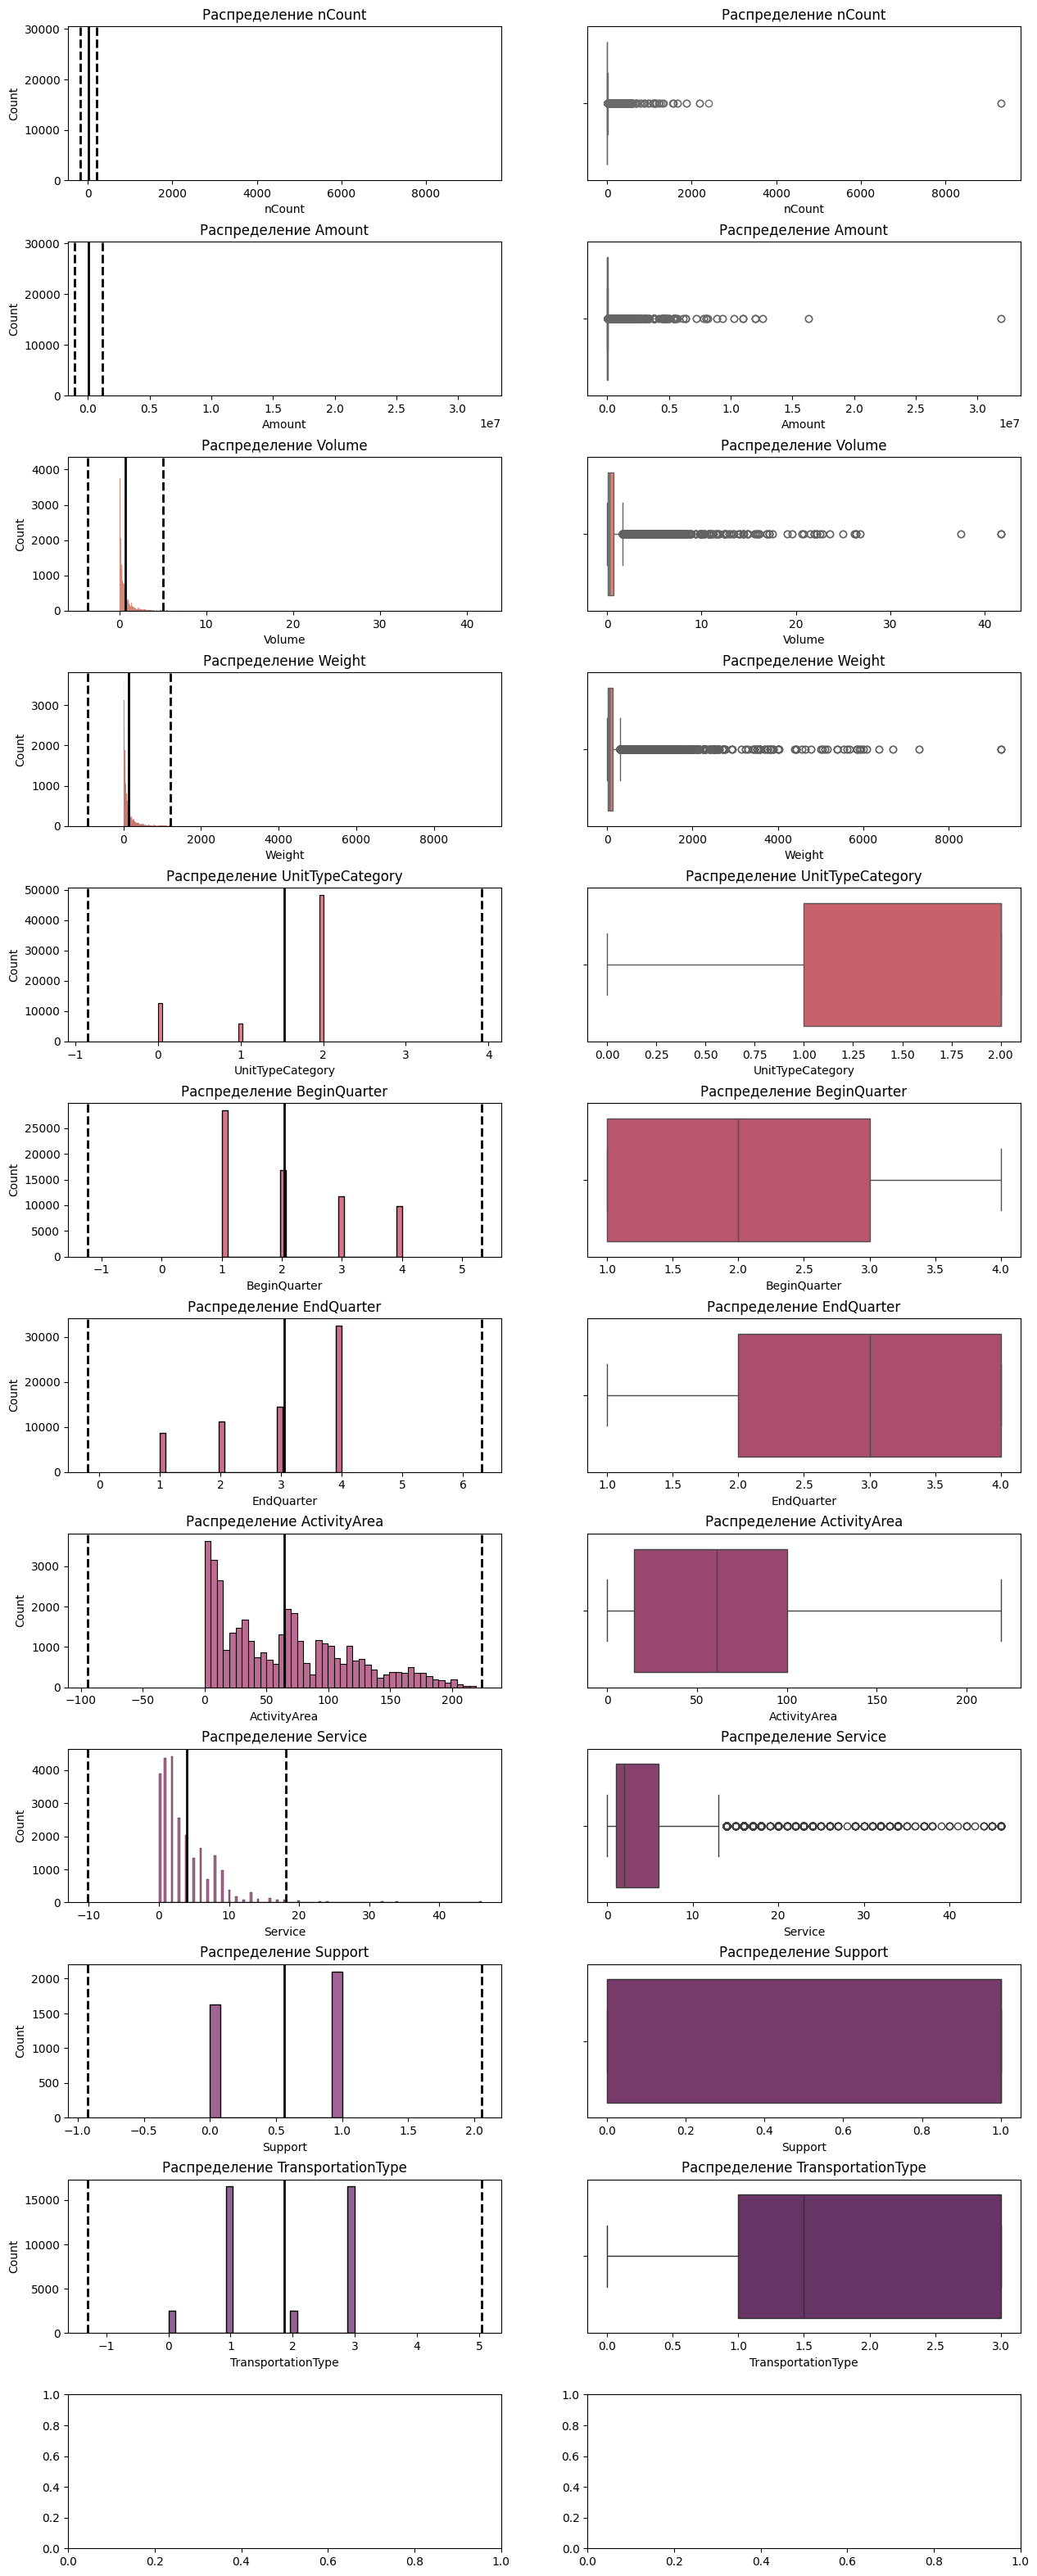

In [25]:
# Прописываем параметры для функции
colors = sns.color_palette('flare', n_colors=12)
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15, 40))
plt.subplots_adjust(hspace=0.4)

columns_to_plot = ['nCount', 'Amount', 'Volume', 'Weight', 
                   'UnitTypeCategory', 'BeginQuarter', 'EndQuarter', 'ActivityArea', 
                   'Service', 'Support', 'TransportationType']
# используем цикл для формирования диаграмм
for i, column in enumerate(columns_to_plot):
    data = behaviourData
    match column:
        case 'Amount':
            data = behaviourData[behaviourData['ResponseDays'].isna()]
        case 'Volume':
            data = behaviourData[behaviourData['Volume'].notna()]
        case 'Weight':
            data = behaviourData[behaviourData['Weight'].notna()]
        case 'ActivityArea':
            data = behaviourData[behaviourData['ActivityArea'].notna()]
        case 'Service':
            data = behaviourData[behaviourData['Service'].notna()]
        case 'Support':
            data = behaviourData[behaviourData['Support'].notna()]
        case 'TransportationType':
            data = behaviourData[behaviourData['TransportationType'].notna()]
    plot_distribution(behaviourData, column, colors[i], i, axes)

In [246]:
behaviourData.describe()

,OKVED,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType
count,54418.000000,66865.000000,6.686500e+04,37972.000000,37972.000000,66865.000000,66865.000000,66865.000000,37972.0,25163.0,3730.0,37972.0
mean,415257.757341,8.460271,5.429555e+04,0.681625,145.460852,1.531623,2.044762,3.058057,64.538976,3.961968,0.564343,1.86943
std,152625.947844,64.445248,3.619850e+05,1.436654,353.610813,0.793924,1.090850,1.081912,53.04241,4.702485,0.495909,1.055249
min,10100.000000,1.000000,0.000000e+00,0.010000,0.010000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0
25%,324000.000000,1.000000,2.690000e+01,0.100000,18.650000,1.000000,1.000000,2.000000,15.0,1.0,0.0,1.0
50%,464700.000000,2.000000,1.600000e+03,0.290000,51.000000,2.000000,2.000000,3.000000,61.0,2.0,1.0,1.5
75%,469000.000000,5.000000,2.492517e+04,0.720000,133.500000,2.000000,3.000000,4.000000,100.0,6.0,1.0,3.0
max,960900.000000,9309.000000,3.187415e+07,41.660000,9217.000000,2.000000,4.000000,4.000000,219.0,46.0,1.0,3.0


Наиболее странным выглядят количество заказов равное 9309, в датасете представлена сводна за год, те операции по этому заказу выполнялись более 20 раз в день,
рассмотрим эти данные, плюс вес 9217 довольно сильно отличается от остальных заказов, рассмотрим их

In [258]:
behaviourData[behaviourData['nCount'] == 9309]

,UID,OKVED,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType,ResponseDays


Данная информация выглядит как дубликат, удалим ее и посмотрим на распределение

In [257]:
behaviourData[behaviourData['Weight'] == 9217]

,UID,OKVED,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType,ResponseDays
51211,FB58E0FD-E32B-4BF1-9ABF-675B480AABD0,470800.0,2023-09-08,2023-09-08,1,0.0,41.66,9217.0,0,3,3,195,<NA>,<NA>,0,<NA>
51212,FB58E0FD-E32B-4BF1-9ABF-675B480AABD0,470800.0,2023-09-08,2023-09-08,1,0.0,41.66,9217.0,0,3,3,2,<NA>,<NA>,1,<NA>
51213,FB58E0FD-E32B-4BF1-9ABF-675B480AABD0,470800.0,2023-09-08,2023-09-08,1,0.0,41.66,9217.0,0,3,3,195,<NA>,<NA>,2,<NA>
51214,FB58E0FD-E32B-4BF1-9ABF-675B480AABD0,470800.0,2023-09-08,2023-09-08,1,0.0,41.66,9217.0,0,3,3,2,<NA>,<NA>,3,<NA>


Средняя стоимость груза здесь указана как 0, что тоже похоже на вброс, удалим

In [259]:
#behaviourData = behaviourData.drop(behaviourData[behaviourData['nCount'] == 9309].index)
behaviourData = behaviourData.drop(behaviourData[behaviourData['Weight'] == 9217].index)
behaviourData.describe()



,OKVED,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType,ResponseDays
count,54412.000000,66859.000000,6.312900e+04,37966.000000,37966.000000,66859.000000,66859.000000,66859.000000,37966.0,25163.0,3730.0,37966.0,3730.0
mean,415251.327630,8.182503,5.750794e+04,0.677339,144.511975,1.531701,2.044736,3.058033,64.538693,3.961968,0.564343,1.869515,2.647721
std,152633.128961,39.571548,3.722944e+05,1.373805,341.157122,0.793867,1.090859,1.081949,53.034264,4.702485,0.495909,1.055219,6.041448
min,10100.000000,1.000000,0.000000e+00,0.010000,0.010000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
25%,324000.000000,1.000000,5.400000e+01,0.100000,18.650000,1.000000,1.000000,2.000000,15.0,1.0,0.0,1.0,0.0
50%,464700.000000,2.000000,2.285710e+03,0.290000,51.000000,2.000000,2.000000,3.000000,61.0,2.0,1.0,1.5,0.0
75%,469000.000000,5.000000,2.752500e+04,0.720000,133.500000,2.000000,3.000000,4.000000,100.0,6.0,1.0,3.0,3.0
max,960900.000000,2399.000000,3.187415e+07,37.440000,7302.000000,2.000000,4.000000,4.000000,219.0,46.0,1.0,3.0,87.0


Сохраним полученный датасет в файл

In [260]:
behaviourData.to_csv("behaviour_2023_preprocessed.csv")

Посмотрим на файл с фидбеками, правок для ясности там вносить не нужно, тк и так количество клонок маленькое и понятное, рассмотрим, есть ли в этом файле информация о контрагентах, которых нет в таблице активностей и исследуем аномалии в данных

In [261]:
feedbackData.describe()

,nClick,nOpen,nSend
count,10000.000000,10000.000000,10000.000000
mean,0.403000,3.252100,0.029800
std,0.851976,2.041363,0.274079
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000
50%,0.000000,2.000000,0.000000
75%,0.000000,4.000000,0.000000
max,6.000000,9.000000,9.000000


Явных аномалий не наблюдается

In [262]:
behaviourContragents = set(behaviourData['UID'].unique())
feedbackContragents = set(behaviourData['UID'].unique())

In [264]:
difference = feedbackContragents - behaviourContragents
difference

set()

In [266]:
differenceB =behaviourContragents - feedbackContragents
differenceB

set()

Таким образом, все данные по контрагентам совпадают, поэтому просто сохраняем копию файлв рядом с обработкой поведения

In [269]:
feedbackData.to_csv("feedback_preprocessed.csv")